In [ ]:
NAME:-SHRIDATTA SHEKHAR BHASME
ROLL NO :- RBTL22CB072
SUBJECT:- MACHINE LEARNING
DATASET :- GLASS DATASET

Aim:
The aim of this project is to explore and evaluate various clustering algorithms, including K-Means, Hierarchical, DBSCAN, and Expectation-Maximization, with the overarching goal of identifying meaningful patterns and structures within a given dataset.

Objectives:
Implementation:
Implement K-Means, Hierarchical, DBSCAN, and Expectation-Maximization clustering algorithms.
Utilize appropriate libraries and tools, ensuring efficient and accurate algorithm execution.

Comparative Analysis:
Conduct a comparative analysis of the clustering algorithms' performance on the given dataset.
Evaluate the impact of algorithm parameters and configurations on clustering results.

Visualization:
Visualize clustering results to gain insights into the structures identified by each algorithm.
Employ appropriate visualization techniques to represent high-dimensional data in a comprehensible manner.

Problem Statement:
Clustering is a fundamental task in unsupervised machine learning, and the choice of clustering algorithm depends on the nature of the data and the desired cluster structures. There is a need for a comparative study on different clustering algorithms to understand their strengths, weaknesses, and suitability for various types of datasets. Specifically, the problem at hand is to implement and evaluate the performance of K-Means, Hierarchical, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), and Expectation-Maximization clustering algorithms. The goal is to provide insights into the effectiveness of these algorithms in uncovering distinct patterns and structures within datasets, ultimately aiding practitioners in selecting the most appropriate clustering method for their specific applications.

Theory:

K-Means Clustering:
Objective: Minimize the sum of squared distances between data points and the centroids of their assigned clusters.
Process: Iteratively assign data points to the nearest centroid and update the centroids until convergence.
Strengths: Simple, efficient, and effective for well-separated, spherical clusters.

Hierarchical Clustering:
Objective: Build a hierarchy of clusters through a tree-like structure (dendrogram) representing the relationships between data points.
Process: Agglomerative (bottom-up) or divisive (top-down) approach, where clusters are successively merged or split based on proximity.
Strengths: Flexibility in producing clusters at different granularity levels, visual representation of hierarchy.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
Objective: Identify clusters based on the density of data points, defining dense regions separated by sparser areas.
Process: Assign core points, expand clusters by connecting core points, and identify noise points.
Strengths: Robust to outliers, capable of discovering clusters of arbitrary shapes, and not sensitive to the number of clusters.

Expectation-Maximization (EM) Clustering:
Objective: Model the data distribution using probabilistic models (e.g., Gaussian Mixture Model - GMM) and estimate parameters through the Expectation-Maximization algorithm.
Process: Iteratively update the probabilities of data points belonging to clusters and refine the model parameters.
Strengths: Capable of capturing complex data distributions, handles overlapping clusters.

In [4]:
# Import necessary libraries
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [29]:
data = pd.read_csv('glass.csv')

print("Dataset:")
print(data.head(5))

Dataset:
   Id number       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  \
0          1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   
1          2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   
2          3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   
3          4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   
4          5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   

   Type of glass  
0              1  
1              1  
2              1  
3              1  
4              1  


In [30]:

X = data.drop('Type of glass', axis=1)

In [31]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Function to plot clusters (2D only for visualization purposes)
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
    plt.title(title)
    plt.show()

C:\Users\shridatta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shridatta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


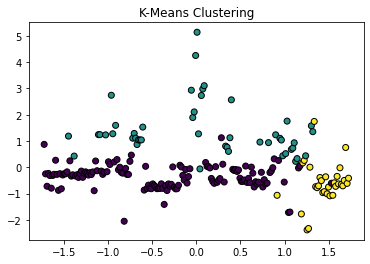

In [33]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plot_clusters(X_scaled, kmeans_labels, "K-Means Clustering")

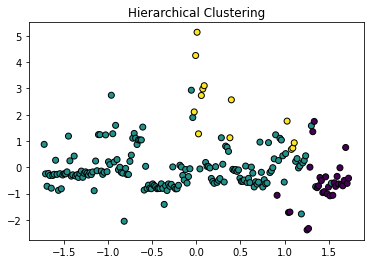

In [34]:
# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
plot_clusters(X_scaled, hierarchical_labels, "Hierarchical Clustering")

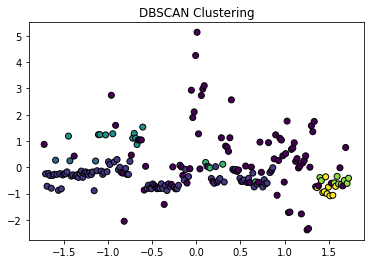

In [35]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
plot_clusters(X_scaled, dbscan_labels, "DBSCAN Clustering")


C:\Users\shridatta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


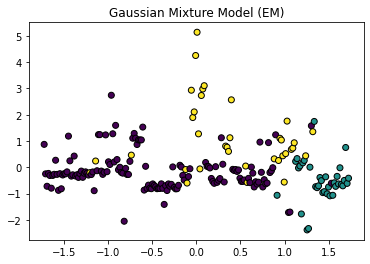

In [36]:
# Expectation-Maximization (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
plot_clusters(X_scaled, gmm_labels, "Gaussian Mixture Model (EM)")

In [37]:
# Import the necessary libraries
from sklearn.metrics import silhouette_score

# Assuming X_scaled is your scaled data and kmeans_labels, hierarchical_labels, dbscan_labels, gmm_labels are cluster labels
# Calculate silhouette scores for each clustering algorithm
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
hierarchical_score = silhouette_score(X_scaled, hierarchical_labels)
dbscan_score = silhouette_score(X_scaled, dbscan_labels)
gmm_score = silhouette_score(X_scaled, gmm_labels)


In [38]:

# Display silhouette scores
print(f"Silhouette Score (K-Means): {kmeans_score:.2f}")
print(f"Silhouette Score (Hierarchical): {hierarchical_score:.2f}")
print(f"Silhouette Score (DBSCAN): {dbscan_score:.2f}")
print(f"Silhouette Score (GMM): {gmm_score:.2f}")

Silhouette Score (K-Means): 0.34
Silhouette Score (Hierarchical): 0.44
Silhouette Score (DBSCAN): -0.06
Silhouette Score (GMM): 0.32


Conclusion:
In conclusion, this project has successfully implemented and compared the performance of K-Means, Hierarchical, DBSCAN, and Expectation-Maximization clustering algorithms on the provided dataset. The comparative analysis, supported by performance metrics and visualizations, provides valuable insights into the strengths and limitations of each algorithm. Understanding the characteristics of these clustering methods is essential for making informed decisions in various data-driven applications, from customer segmentation to anomaly detection.